In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

np.set_printoptions(suppress=True)
np.set_printoptions(precision=2) #设精度为3
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data = np.loadtxt("./data/data2.csv", delimiter=",", skiprows=1)
print(data[0:10,0])
print(data[0:10,1])

[ 5. -5.  5.  5. -5.  5. -5. -5.  5. -5.]
[-6.92 -4.56 -4.23 -2.35  8.14 12.09 14.23  8.83 -2.59 -6.8 ]


1.1391161981077362
[-1.49  0.69  0.98  0.56 -0.51 -0.13]


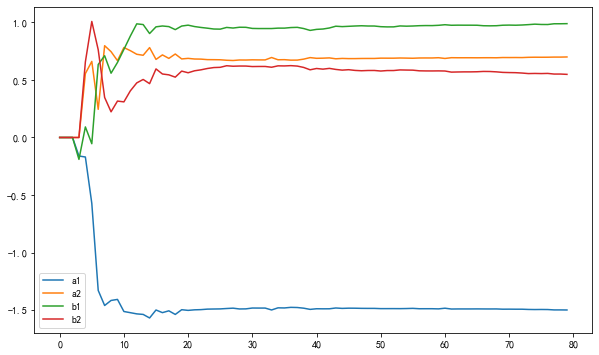

In [6]:
# RML
# 参数初始化
na = 2
nb = 2
nd = 2
nMax = max(na, nb, nd)
L = 80 # 数据长度
a = 1

u = data[:L + nMax, 0]
z = data[:L + nMax, 1]
uf = np.zeros(len(u))
zf = np.zeros(len(z))
z_pre = np.zeros((len(z), 1))

v1 = np.zeros(len(u)) # 噪声估计值
v1f = np.zeros(len(u)) # 噪声估计滤波值

# 序列初始化
h = np.zeros((L, na + nb + nd, 1))
hf = np.zeros((L, na + nb + nd, 1))
P = np.array([a**2 * np.eye((na + nb + nd))] * (L))
s = np.zeros(L) # 数
Inn = np.zeros(L) # 数
K = np.zeros((L, na + nb + nd, 1))
Theta = np.zeros((L, na + nb + nd, 1))   # [a1,a2,b1,b2].T
J = np.zeros(L) # 数


for k in range(nMax, L):
    for i in range(na):
        h[k][i] = -1 * z[k - i - 1]
        hf[k][i] = -1 * zf[k - i - 1]
    for j in range(nb):
        h[k][na + j] = u[k - j - 1]
        hf[k][na + j] = uf[k - j - 1]
    for i in range(nd):    
        h[k][na + nb + i] = v1[k - i - 1]
        hf[k][na + nb + i] = v1f[k - i - 1]
        
    s[k] = hf[k].T @ P[k - 1] @ hf[k] + 1.0
    Inn[k] = z[k] - h[k].T @ Theta[k - 1]
    K[k] = P[k - 1] @ hf[k] / s[k]
    P[k] = P[k-1] - K[k] @ K[k].T * s[k]
    Theta[k] = Theta[k - 1] + K[k] * Inn[k]
    J[k] = J[k-1] + Inn[k]**2 / s[k]
    v1[k] = z[k] - h[k].T @ Theta[k]
    zf[k] = z[k]
    uf[k] = u[k]
    v1f[k] = v1[k]
    for i in range(nd):
        zf[k] = zf[k] - Theta[k][na + nb + i] * zf[k - i - 1]
        uf[k] = uf[k] - Theta[k][na + nb + i] * uf[k - i - 1]
        v1f[k] = v1f[k] - Theta[k][na + nb + i] * v1f[k - i - 1]
    

plt.figure(1,figsize=(10,6))

ax4 = plt.subplot(1,1,1)
ax4.plot(range(L),Theta[:,0],
        range(L),Theta[:,1],
        range(L),Theta[:,2],
        range(L),Theta[:,3],)
ax4.legend(["a1", "a2", "b1", "b2"])

print(np.sqrt(J[L - 1]/L))
Theta_hat = np.sum(Theta[-21:-1][:,:,0], axis=0)/ 20
print(Theta_hat.T)

# # 计算残差
# err = [] # 数 残差
# for k in range(2*nMax, L + nMax - 1):
#     for i in range(na):
#         h[k][i] = -1 * z[k - i - 1]
#     for j in range(nb):
#         h[k][na + j] = u[k - j - 1]
#     for i in range(nd):    
#         h[k][na + nb + i] = v1[k - i - 1]
        
#     err.append(z[k] - h[k].T @ Theta_hat)
#     z_pre[k] = h[k].T @ Theta_hat

# err = np.array(err).reshape((-1,1))    
# ax3 = plt.subplot(3,1,2)
# ax3.plot(range(len(err)), err)

# for k in range(2*nMax, L + nMax - 1):
#     for i in range(na):
#         h[k][i] = -1 * z_pre[k - i - 1]
#     for j in range(nb):
#         h[k][na + j] = u[k - j - 1]
#     for i in range(nd):    
#         h[k][na + nb + i] = v1[k - i - 1]
        
#     z_pre[k] = h[k][0: na + nb].T @ Theta_hat[0: na + nb]
    
# ax5 = plt.subplot(3,1,3)
# ax5.plot(range(L), z[nMax:nMax+L],range(L), z_pre[nMax:nMax+L])
# ax5.set_ylabel("$"+"z_pre"+"$",fontsize=10)

In [6]:
s

array([ 0.00e+000,  0.00e+000,  1.00e+000,  6.17e+001,  7.22e+001,
        5.93e+001,  2.26e+002,  8.90e+001,  1.18e+001,  3.01e+000,
        3.12e+001, -6.62e+001,  2.53e+002, -6.08e+001,  6.71e+003,
        4.76e+003,  1.07e+006,  5.62e+006,  1.38e+008,  1.16e+010,
        8.60e+011,  2.09e+014,  3.52e+016, -1.82e+018, -3.28e+020,
        9.90e+022, -1.58e+025, -7.41e+028,  4.22e+031,  3.19e+033,
       -3.66e+035,  1.23e+037,  1.79e+041,  3.00e+044,  4.77e+047,
        3.86e+050,  1.90e+053,  5.68e+056,  4.46e+060, -3.59e+065,
        1.53e+070, -3.52e+076,  2.74e+081, -7.20e+086,  2.08e+092,
        1.82e+098, -4.68e+103, -2.92e+111, -3.22e+116, -5.48e+123,
        7.41e+128,  4.20e+138, -1.39e+146, -2.50e+154, -4.83e+161,
       -2.56e+168, -2.15e+176, -7.32e+183,  1.31e+192, -1.02e+200,
        5.62e+207, -4.26e+215, -3.21e+224, -2.38e+233, -3.08e+242,
       -5.37e+251,  1.20e+260, -2.83e+269, -6.60e+278,  3.35e+290,
       -4.23e+299,        nan,        nan,        nan,        